In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


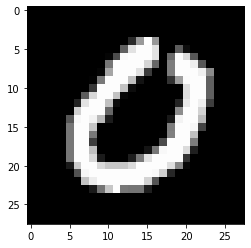

In [13]:
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

image = mnist.train.images[7].reshape([28, 28])
plt.gray()
plt.imshow(image)

In [14]:
print(mnist.train.images[7].shape)
print(mnist.train.labels[7].shape)

(784,)
(10,)


In [15]:
print(mnist.train.images[7][150:200])

[0.         0.         0.37254903 0.8862746  0.9921569  0.9921569
 0.8862746  0.         0.         0.36078432 0.0509804  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01960784 0.29803923
 0.97647065 0.9921569  0.9921569  0.9921569  0.8862746  0.
 0.41176474 0.9843138  0.854902   0.34117648 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [16]:
print(mnist.train.labels[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [17]:
learning_rate = 0.1
epochs = 1000
batch_size = 128

n_hidden_1 = 256
n_hidden_2 = 256
num_input = 784 # 28 x 28
num_classes = 10

X = tf.placeholder('float', [None, num_input])
Y = tf.placeholder('float', [None, num_classes])

In [18]:
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'output': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'output': tf.Variable(tf.random_normal([num_classes])),
}

In [19]:
def network(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    output_layer = tf.matmul(layer_2, weights['output'] + biases['output'])
    
    return output_layer

In [20]:
logits = network(X)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

correct_prediction = tf.equal(tf.arg_max(logits, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()

In [10]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={X: batch_x, Y: batch_y})
        
        if epoch % 50 == 0:
            train_accuracy = sess.run(accuracy, feed_dict={X: mnist.train.images, Y: mnist.train.labels})
            print('Epoch #{}: train accuracy = {}'.format(epoch, train_accuracy))
            
    print('Test accuracy = {}'.format(sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})))

Epoch #0: train accuracy = 0.3203999996185303
Epoch #50: train accuracy = 0.8359454274177551
Epoch #100: train accuracy = 0.8390727043151855
Epoch #150: train accuracy = 0.8585454821586609
Epoch #200: train accuracy = 0.8410181999206543
Epoch #250: train accuracy = 0.8668727278709412
Epoch #300: train accuracy = 0.8428545594215393
Epoch #350: train accuracy = 0.8357818126678467
Epoch #400: train accuracy = 0.854418158531189
Epoch #450: train accuracy = 0.8374363780021667
Epoch #500: train accuracy = 0.8557817935943604
Epoch #550: train accuracy = 0.8323818445205688
Epoch #600: train accuracy = 0.8726000189781189
Epoch #650: train accuracy = 0.8634727001190186
Epoch #700: train accuracy = 0.8338545560836792
Epoch #750: train accuracy = 0.8672727346420288
Epoch #800: train accuracy = 0.8186363577842712
Epoch #850: train accuracy = 0.8303999900817871
Epoch #900: train accuracy = 0.8597272634506226
Epoch #950: train accuracy = 0.8640909194946289
Test accuracy = 0.8424999713897705
